In [4]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [5]:
# 📦 Importações
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

plt.style.use('seaborn-v0_8-darkgrid')
# estilo seguro e bonito

%matplotlib inline


In [8]:
# 📥 Leitura do CSV
df = pd.read_csv("googleplaystore.csv")
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
# 🔍 Remoção de duplicatas
df = df.drop_duplicates()
print(f"Número de linhas após remoção de duplicadas: {len(df)}")


Número de linhas após remoção de duplicadas: 10358


In [22]:
# 🧼 Limpeza dos dados

# Remover duplicatas
df = df.drop_duplicates()

# Limpar 'Installs' — remover vírgulas e '+', converter para número
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '').replace('+', '').strip())
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Limpar 'Price' — remover cifrão, converter para número
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '').strip())
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Converter 'Reviews' para numérico
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Remover entradas com installs ou reviews inválidos
df = df.dropna(subset=['Installs', 'Reviews'])

# Se houver apps duplicados, manter o com mais instalações
df = df.sort_values('Installs', ascending=False).drop_duplicates(subset='App', keep='first')

# Verificar formato final
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8905 entries, 3523 to 8871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8905 non-null   object 
 1   Category        8905 non-null   object 
 2   Rating          7594 non-null   float64
 3   Reviews         8905 non-null   float64
 4   Size            8905 non-null   object 
 5   Installs        8905 non-null   float64
 6   Type            8904 non-null   object 
 7   Price           8905 non-null   float64
 8   Content Rating  8905 non-null   object 
 9   Genres          8905 non-null   object 
 10  Last Updated    8905 non-null   object 
 11  Current Ver     8899 non-null   object 
 12  Android Ver     8904 non-null   object 
dtypes: float64(4), object(9)
memory usage: 974.0+ KB


5 Apps com mais instalações

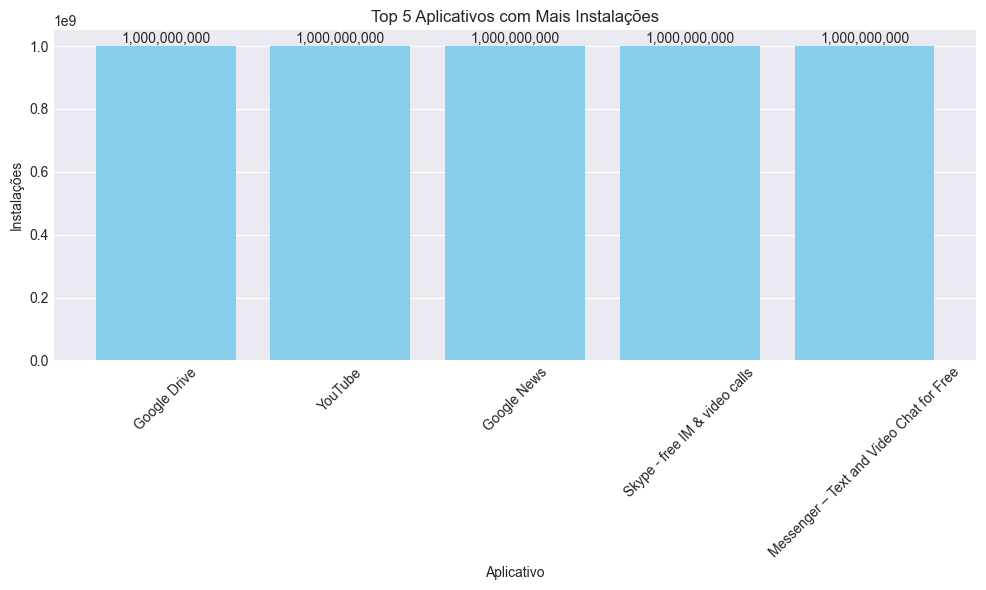

In [23]:
# 📊 Top 5 aplicativos com mais instalações

top5 = df.sort_values('Installs', ascending=False).head(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(top5['App'], top5['Installs'], color='skyblue')
plt.title('Top 5 Aplicativos com Mais Instalações')
plt.xlabel('Aplicativo')
plt.ylabel('Instalações')
plt.xticks(rotation=45)

# Adicionar números em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{int(yval):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


grafico de pizzas

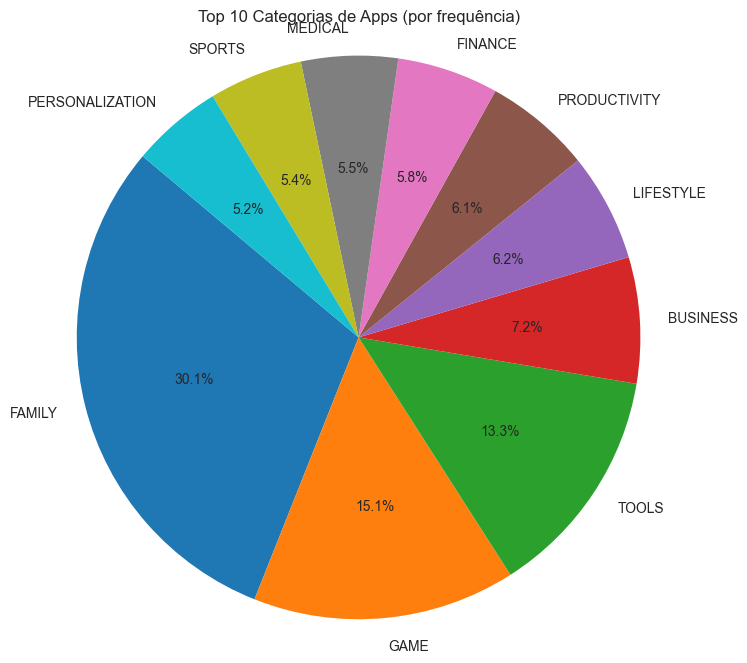

In [25]:
# 🥧 Gráfico de Pizza: frequência de categorias de apps

categoria_freq = df['Category'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(categoria_freq, labels=categoria_freq.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Categorias de Apps (por frequência)')
plt.axis('equal')  # para manter a forma circular
plt.show()



Apps mais caros

In [26]:
# 💰 App mais caro do dataset

app_mais_caro = df.sort_values('Price', ascending=False).head(1)
print("App mais caro:")
print(app_mais_caro[['App', 'Price', 'Category']])

mais_caro = df[df['Price'] == df['Price'].max()]
mais_caro[['App', 'Price']]


App mais caro:
               App  Price      Category
3523  Google Drive    0.0  PRODUCTIVITY


,App,Price
3523,Google Drive,0.0
9844,Google News,0.0
2808,Google Photos,0.0
1654,Subway Surfers,0.0
4153,Hangouts,0.0
...,...,...
8614,Sweden Newspapers,0.0
7434,Pekalongan CJ,0.0
9148,Command & Conquer: Rivals,0.0
8081,CX Network,0.0


Número de Apps 'Mature 17+'

In [ ]:
# 🔞 Quantos apps são classificados como "Mature 17+"

mature_count = df[df['Content Rating'] == 'Mature 17+'].shape[0]
print(f"Quantidade de apps 'Mature 17+': {mature_count}")


Número de apps 'Mature 17+': 375
Quantidade de apps 'Mature 17+': 375


Top 10 por Número de Reviews (Até aqui é obrigatório)

In [29]:
# 🏆 Top 10 apps com maior número de reviews

print("Top 10 apps com mais reviews:")



top_reviews = df.sort_values('Reviews', ascending=False).head(10)
top_reviews[['App', 'Reviews']]


Top 10 apps com mais reviews:


,App,Reviews
3943,Facebook,78128208.0
3904,WhatsApp Messenger,69109672.0
3909,Instagram,66509917.0
335,Messenger – Text and Video Chat for Free,56642847.0
3986,Clash of Clans,44881447.0
4005,Clean Master- Space Cleaner & Antivirus,42916526.0
1654,Subway Surfers,27722264.0
3665,YouTube,25655305.0
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0
3987,Clash Royale,23125280.0


In [34]:
# Lista de apps gratuitos com rating alto
apps_rating_alto = df[(df['Type'] == 'Free') & (df['Rating'] > 4.7)].sort_values('Installs', ascending=False)
print("Apps gratuitos com rating > 4.7:")
apps_rating_alto[['App', 'Rating', 'Installs']]


Apps gratuitos com rating > 4.7:


,App,Rating,Installs
1360,Period Tracker - Period Calendar Ovulation Tra...,4.8,100000000.0
4038,"DU Recorder – Screen Recorder, Video Editor, Live",4.8,50000000.0
5704,Video Player All Format,4.8,10000000.0
1820,"Cash, Inc. Money Clicker Game & Business Adven...",4.8,10000000.0
1261,Lose Weight in 30 Days,4.8,10000000.0
...,...,...,...
6700,Brick Breaker BR,5.0,5.0
7731,CQ ESPM,5.0,5.0
2484,Clinic Doctor EHr,5.0,5.0
2450,Tablet Reminder,5.0,5.0


In [40]:
# Filtrar apps da categoria GAME
apps_game = df[df['Category'] == 'GAME']

# Calcular a média de reviews
media_reviews_game = apps_game['Reviews'].mean()

print(f"Média de reviews para apps da categoria 'GAME': {media_reviews_game:.0f}")


Média de reviews para apps da categoria 'GAME': 509109


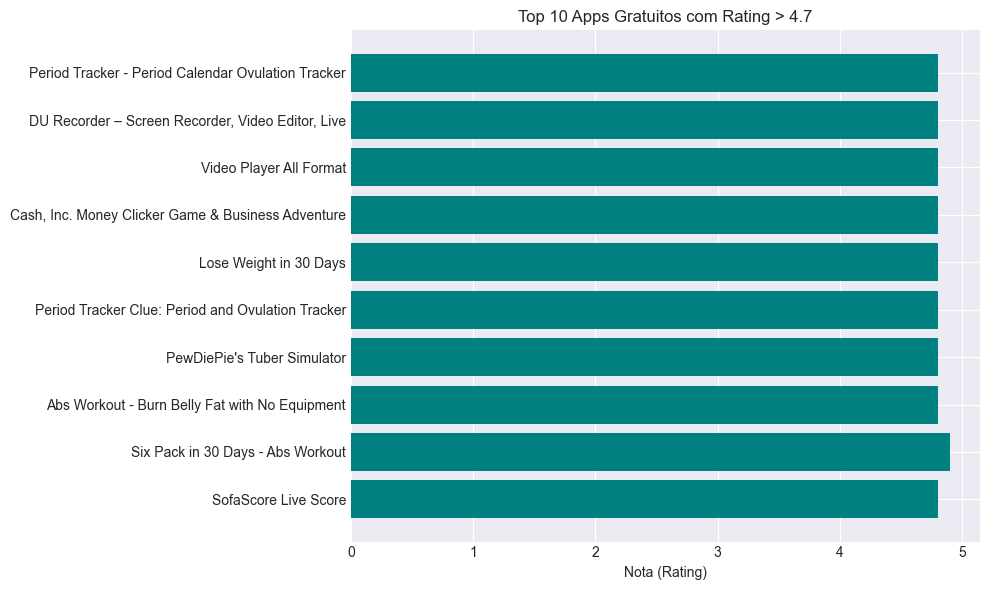

In [36]:
top_free_high_rating = apps_rating_alto.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_free_high_rating['App'], top_free_high_rating['Rating'], color='teal')
plt.xlabel('Nota (Rating)')
plt.title('Top 10 Apps Gratuitos com Rating > 4.7')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


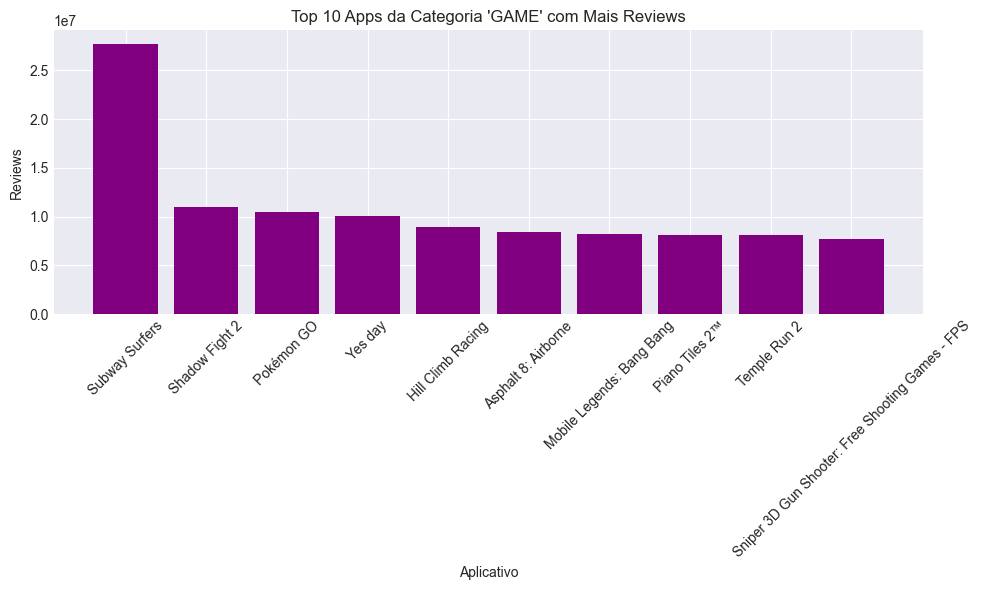

In [41]:
# Top 10 apps da categoria GAME com mais reviews
top_games_reviews = apps_game.sort_values('Reviews', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_games_reviews['App'], top_games_reviews['Reviews'], color='purple')
plt.title("Top 10 Apps da Categoria 'GAME' com Mais Reviews")
plt.xlabel("Aplicativo")
plt.ylabel("Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
